# Análisis de la actividad 6

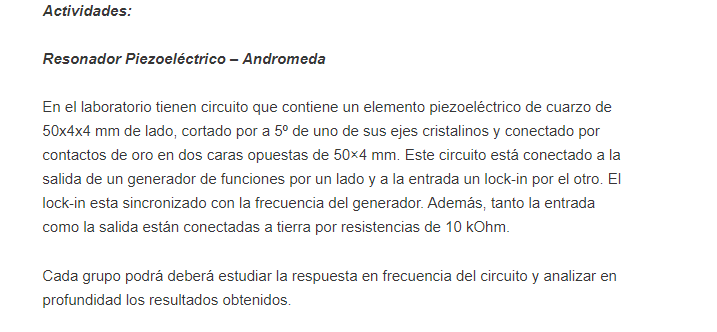

Para la medición más adecuada, la medicion 6 (med_6):
- sensibilidad = 25 $\Rightarrow$ 0.5V
- pendiente = 3 $\Rightarrow$ 24db/oct
- tiempo de integracion = 8 $\Rightarrow$ 0.1 s
- voltaje de entrada  = 1V

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

med_6 = np.loadtxt(f"0506/med6.txt", delimiter=",")

frec = med_6[:,0]
r    = med_6[:,1]
t    = med_6[:,2]

trans_2 = (2*r)**2 #Transferencia al cuadrado
plt.plot(frec, trans_2, '.')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Ajustamos la transferencia al cuadrado en función de la frecuencia por una gaussiana para obtener mejor los parametros

In [2]:
from scipy.optimize import curve_fit

def gauss(x,a,x0,sigma, b):
    return a*np.exp(-((x-x0)**2)/(2*sigma**2)) + b

def lorentzian2( x, x0, a, gam ):
    return a * gam / ( gam**2 + ( x - x0 )**2)

x0 = 50096
sigma = 3
a = 0.5
b = 0.02

f0 = 50095.5

popt, pcov = curve_fit(gauss, frec, trans_2, p0 = [a, x0, sigma, b])
popt2, pcov2 = curve_fit(lorentzian, frec, trans_2, p0 = [x0, a, 1])



frecs_aprox = np.linspace(50080, 50110, 500)
trans_aprox = gauss(frecs_aprox, popt[0], popt[1], popt[2], popt[3])
trans_aprox_lorenz = lorentzian(frecs_aprox, popt2[0], popt2[1], popt2[2])

plt.figure()
plt.plot(frec/f0, trans_2, '.k', label = 'datos adquiridos')
#plt.plot(frecs_aprox/f0, trans_aprox, 'r-', label = 'Ajuste gaussiano')
plt.plot(frecs_aprox/f0, trans_aprox_lorenz, '-r', label = 'Ajuste lorenziano')
plt.axhline(max(trans_2)/2,linestyle = 'dashed', label = 'Mitad de altura')
plt.legend()



NameError: name 'lorentzian' is not defined

Caluclo berreta del factor de calidad o no tan berreta

In [3]:
x2 = 0.999949
x1 = 1.00005

Q = 1/(x1-x2)
print(Q)

9900.990098997278


Grafico la fase.

In [4]:
plt.figure()
plt.plot(frec, t,'.')
plt.grid()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Mediciones 06/06

In [5]:
import seaborn as sns
plt.figure()
for i in range(10):
    med = np.loadtxt(f"0606/med{i+1}.txt", delimiter=",")

    frec = med[:,0]
    r    = med[:,1]
    t    = med_6[:,2]

    trans_2 = (2*r)**2 #Transferencia al cuadrado
    #plt.figure()
    plt.plot(frec, r, '-', label  = str(i+1))
    plt.title(i+1)
    plt.yscale('log')
    plt.legend()
    plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

- Medicion 1: satura
- Medicion 2: pico de antiresonancia, satura al pricipio entre 50,1 kHz y 50,8 k Hz
- Medicion 3: barrido fino de antiresonancia entre 50 kHz y 50,3 kHz 
- Medicion 4: ambos picos, hasta aca siempre fueron 100 puntos
- Medicion 5: mejor definicion de los dos picos, medicion entre 50 kHz y 50,45 k Hz tomando 200 puntos
- Medicion 6: buena definicion del minimo
- Medicion 7: buena definicion del maximo
- Medicion 8: mejor definicion del maximo, flashie en el otro
- Medicion 9: entre 45 k y 55k Hz
- Medicion 10: super barrido desde 1 a 100k Hz tomando 500 puntos

In [6]:
med = []
for i in range(10):
    med.append(np.loadtxt(f"0606/med{i+1}.txt", delimiter=","))

In [7]:
x0 = f0
a = 0.3

def lorentzian( x, x0, a, gam ):
    return (a/np.pi) * gam / ( gam**2 + ( x - x0 )**2)

def lorenziana_clase(x,x0,q,a):
    s = 1j * x
    y = (s*x0/q)/(x0**2 + s**2 + (s*x0/q))
    return np.abs(y)**2

popt2, pcov2 = curve_fit(lorentzian, med[7][:,0], (med[7][:,1]*2)**2, p0 = [x0, a, 1])
popt3, pcov3 = curve_fit(lorenziana_clase, med[7][:,0], (med[7][:,1]*2)**2, p0 = [x0, 10000,0.5])
perr = np.sqrt(np.diag(pcov3))

frecs_aprox = np.linspace(50080, 50110, 500)
trans_aprox_lorenz = lorentzian(frecs_aprox, popt2[0], popt2[1], popt2[2])
trans_lorenz_clase = lorenziana_clase(frecs_aprox, popt3[0], popt3[1],popt3[2])


fig, (ax1, ax2) = plt.subplots(2,1, figsize =(12,8) ,sharex = True)
ax1.plot(med[7][:,0],(2*med[7][:,1]), 'k.')
ax1.axvline(50095.239, linestyle = 'dashed', color = 'red')
#plt.plot(frecs_aprox/f0, trans_aprox_lorenz, '-r', label = 'Ajuste lorenziano')
#plt.plot(frecs_aprox/f0,trans_lorenz_clase, '-b', label = 'Ajuste lorenziano Claese')
#plt.axhline((max((2*med[7][:,1])**2) + min((2*med[7][:,1])**2))/2,linestyle = 'dashed', label = 'Mitad de altura')
ax1.grid()
#plt.xlabel('Frecuencia [Hz]')
ax1.set_ylabel('Transferencia',fontsize = 12)
ax2.axvline(50095.239, linestyle = 'dashed',color = 'red', label = 'Frecuencia de resonancia')

ax2.plot(med[7][:,0],med[7][:,2], 'k.', label = 'Datos adquiridos')
ax2.set_ylabel('Fase[grad]', fontsize = 12)
ax2.grid()
plt.legend()
plt.savefig('zoom_maximo_tyf.pdf')


C:\Users\Ale\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [8]:
x0 = f0
a = 0.3

def lorentzian( x, x0, gam ):
    return (1/np.pi) * gam / ( gam**2 + ( x - x0 )**2)

def lorenziana_clase(x,x0,q):
    s = 1j * x
    y = (s*x0/q)/(x0**2 + s**2 + (s*x0/q))
    return np.abs(y)**2

def simulacion(s,r,C,L,Co,R,Rg):
    z1 = r + s*L + 1/(s*C)
    z2 = 1/(s*Co)
    z = (1/z1 + 1/z2)**-1
    div_1 = R/(z + R)
    div_2 = R/(Rg+R)
    return ((div_1*div_2))


r2 = (((med[7][:,1])*2)**2)/max((((med[7][:,1])*2)**2))

popt2, pcov2 = curve_fit(lorentzian, med[7][:,0], r2, p0 = [x0,  0.01])
popt3, pcov3 = curve_fit(lorenziana_clase, med[7][:,0], r2, p0 = [x0, 10000])
perr = np.sqrt(np.diag(pcov3))

trans_aprox_lorenz = lorentzian(frecs_aprox, popt2[0], popt2[1])
trans_lorenz_clase = lorenziana_clase(frecs_aprox, popt3[0], popt3[1])


plt.figure()
plt.plot(med[7][:,0]/f0,r2, 'k.', label = 'Datos normalizados')
#plt.plot(frecs_aprox/f0, trans_aprox_lorenz, '-r', label = 'Ajuste lorenziano')
plt.plot(frecs_aprox/f0,trans_lorenz_clase, '-r', label = 'Ajuste lorenziano')
plt.axhline((max(r2) + min(r2))/2,linestyle = 'dashed', color = 'navy',label = 'Mitad de altura')
plt.legend()
plt.grid()
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Transferencia al cuadrado normalizada')
#plt.savefig('ajuste_lorenziano.png', dpi = 1000)


popt3[1],perr
Q = 1/(1.00005-0.999937)

print(f'Factor de calidad Q: Ajuste = {popt3[1]} $\pm$ {perr[1]} \n A ojo {Q}')
print(popt3[0])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Factor de calidad Q: Ajuste = 8332.190844264362 $\pm$ 13.837287084472315 
 A ojo 8849.55752211287
50095.23900678454


#### Calculo el factor de calidad Q

In [9]:
x1 = 0.999937
x2 = 1.00005
Q = 1/(x2-x1)
print(Q, x2-x1)

8849.55752211287 0.00011300000000014077


## Más figuras de análisis para presentar

In [10]:

# popt2, pcov2 = curve_fit(lorentzian, med[1][:,0][10:], (med[1][:,1][10:]*2)**2, p0 = [50300, 1,1])
# frecs_aprox = np.linspace(50080, 50110, 500)
# trans_aprox_lorenz = lorentzian(frecs_aprox, popt2[0], popt2[1], popt2[2])
fig, (ax1, ax2) = plt.subplots(2,1, figsize =(12,8) ,sharex = True)

ax1.plot(med[5][:,0], (2*med[5][:,1]), '.k')
ax1.plot(med[1][:,0][10:], (2*med[1][:,1][10:]) ,'k.')
#ax1.set_xlabel('Frecuencia [Hz]')
ax1.set_ylabel('Transferencia', fontsize=13)
ax1.axvline(50285.2, linestyle = 'dashed',color = 'red')

ax1.grid()
#plt.plot(med[2][:,0], med[2][:,1] ,'*')
#plt.plot(frecs_aprox, trans_aprox_lorenz, '-r', label = 'Ajuste lorenziano')
ax1.set_yscale('log')
#plt.savefig('zoom_min.png', dpi = 1000)
#plt.figure()
ax2.plot(med[5][:,0], med[5][:,2], '.k')
ax2.plot(med[1][:,0][10:], med[1][:,2][10:] ,'k.',label = 'Datos adquiridos')
ax2.set_xlabel('Frecuencia [Hz]', fontsize=13)
ax2.axvline(50285.2, linestyle = 'dashed',color = 'red', label = 'Frecuencia de anti-resonancia')
ax2.set_ylabel('Fase [grad]', fontsize=13)
ax2.grid()
plt.legend()
plt.savefig('min_.pdf')
#plt.plot(med[2][:,0], med[2][:,1] ,'*')
#plt.plot(frecs_aprox, trans_aprox_lorenz, '-r', label = 'Ajuste lorenziano')



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [11]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize =(12,8) ,sharex = True)

ax1.plot(med[4][:,0], (2*med[4][:,1]), '.k')
ax1.set_yscale('log')
ax1.grid()
#plt.xlabel('Frecuencia [Hz]')
ax1.set_ylabel('Transferencia',fontsize=12)
#plt.savefig('max_y_min.png', dpi = 1000)
ax2.plot(med[4][:,0], med[4][:,2], '.k')
ax2.grid()
ax2.set_xlabel('Frecuencia [Hz]',fontsize=12)
ax2.set_ylabel('Fase [grad]',fontsize=12)
plt.savefig('max_min_tyf.pdf')

#plt.savefig('max_y_min.png', dpi = 1000)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [12]:
plt.figure()
plt.plot(med[9][:,0], (2*med[9][:,1])**2, '.k')
#plt.yscale('log')
plt.figure()
plt.plot(med[9][:,0], med[9][:,2], '.k')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [78]:
def transf(s,r,C,L,Co,R,Rg):
    z1 = r + s*L + 1/(s*C)
    z2 = 1/(s*Co)
    z = (1/z1 + 1/z2)**-1
    div_1 = R/(z + R)
    div_2 = R/(Rg+R)
    return ((div_1*div_2)+0.011)

frecs_aprox = np.linspace(50080, 50110, 500)


pi2 = 2*np.pi


s = frecs_aprox*pi2*1j

T_res = 0.64446
Q = 8332
w_res = 50095.3 *  pi2
w_antires = 50284 *pi2

R_2 = 10000 #ohms

R = (R_2/T_res) - R_2 +250
L = (Q*(R+R_2))/w_res -160
C = 1/(L*w_res**2)
C2 = 1/(L*w_antires**2 - 1/C)


Rg = 0
t = transf(s,R,C,L,C2,R_2,Rg)

plt.figure()
plt.plot(frecs_aprox, t, label = 'transferencia simulada')
plt.plot(med[7][:,0],(2*med[7][:,1]), 'k.', label = 'datos tomados')
plt.legend()


frecs_aprox_2 =  np.linspace(1, 100000, 10000)
s_2 = frecs_aprox_2*pi2*1j
t2 = transf(s_2,R,C,L,C2,R_2,Rg)


plt.figure()
plt.plot(frecs_aprox_2, t2, label = 'transferencia simulada')
plt.plot(med[9][:,0],(2*med[9][:,1]), 'k.', label = 'datos tomados')
plt.legend()


<ipython-input-78-caf571f27520>:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

C:\Users\Ale\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
<ipython-input-78-caf571f27520>:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

C:\Users\Ale\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


## Intento scacar bondad de ajuste pero sale mal

In [13]:
from scipy.odr import RealData, Model, ODR
import scipy.stats as stats
model = Model(lorentzian)
mydata = RealData(med[7][:,0], ((2*med[7][:,1])**2))
myodr = ODR(mydata, model, beta0 = [50096, 0.5 , 1])
myoutput = myodr.run()
myoutput.pprint()
pval = 1 - stats.chi2.cdf(myoutput.res_var, len(yn) - len(M))

print(f"\nChi square of fit / dof: {myoutput.res_var} / {len(yn) - len(M)}")
print(f"P-value: {pval}\n")
from scipy.stats import chi2

def chisq(ydata, ymodelo,sd):
    chisq = sum(((ydata-ymodelo)/sd)**2)
    return chisq
    
def rval( ydata, chi, gl):  #reduce chi square   gl = numero de parametros de la funcion es bueno q este cerca de 1
    k=len(ydata)-1-gl
    rval=chi/k   
    return rval, k

def pvalor(chi, k):         #integral de ña distribucion de chisq es bueno q este cerca de 0
    p  = 1- chi2.cdf(chi, k)
    return p
frecs_aprox = np.linspace(50080, 50110, 200)
trans_aprox_lorenz = lorentzian(frecs_aprox, popt2[0], popt2[1], popt2[2])

chi = chisq((2*med[7][:,1])**2, trans_aprox_lorenz, 0.001)
rvalue = rval((2*med[7][:,1])**2, chi, 3)
pvalue = pvalor(chi, rvalue[1])
print(f'r value = {rvalue[0]} \n p value = {pvalue}')

TypeError: lorentzian() missing 1 required positional argument: 'gam'